In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import load_boston

from matplotlib import pyplot as plt

import numpy as np

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

from skcosmo.linear_model import IncrementalRidge
from skcosmo.preprocessing import StandardFlexibleScaler

In /home/helfrech/.config/matplotlib/stylelib/cosmo.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/helfrech/.config/matplotlib/stylelib/cosmo.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/helfrech/.config/matplotlib/stylelib/cosmo.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/helfrech/.config/matplotlib/stylelib/cosmo.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/helfrech/.config/matplotlib/stylelib/cosmo.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/helfrech/.config/matplotlib/stylelib/cosmo.mplstyle: 
Th

Load boston housing data from scikit-learn

In [3]:
#X, Y = load_boston(return_X_y=True)
X = np.random.rand(1000, 500)
Y = np.random.rand(1000)
Y = Y.reshape(-1, 1)

X_scaler = StandardFlexibleScaler(with_mean=True, with_std=True, column_wise=False)
X = X_scaler.fit_transform(X)

Y_scaler = StandardFlexibleScaler(with_mean=True, with_std=True, column_wise=True)
Y = Y_scaler.fit_transform(Y)

#### Incremental Ridge

In [4]:
# Using partial_fit
iridge = IncrementalRidge(fit_intercept=False)

batch_size = 10
n_batches = len(X) // batch_size
if len(X) % n_batches > 0:
    n_batches += 1
    
for n in range(0, n_batches):
    batch_slice = slice(n*batch_size, (n+1)*batch_size)
    X_batch = X[batch_slice]
    Y_batch = Y[batch_slice]
    iridge.partial_fit(X_batch, Y_batch)
    
Y_pred_iridge = iridge.predict(X)
print(mean_absolute_error(Y, Y_pred_iridge))

0.5145477867129972


In [13]:
batch_size = 100
n_batches = len(X) // batch_size
if len(X) % n_batches > 0:
    n_batches += 1

In [14]:
%%timeit
# Using partial_fit
iridge = IncrementalRidge(fit_intercept=False)

    
for n in range(0, n_batches):
    batch_slice = slice(n*batch_size, (n+1)*batch_size)
    X_batch = X[batch_slice]
    Y_batch = Y[batch_slice]
    iridge.partial_fit(X_batch, Y_batch)
    
Y_pred_iridge = iridge.predict(X)
print(mean_absolute_error(Y, Y_pred_iridge))

0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867129977
0.5145477867

In [15]:
%%timeit

tol = 1.0E-12
C = np.eye(X.shape[1])
XY = np.zeros((X.shape[1], Y.shape[1]))
    
for n in range(0, n_batches):
    batch_slice = slice(n*batch_size, (n+1)*batch_size)
    X_batch = X[batch_slice]
    Y_batch = Y[batch_slice]
    
    XY += X_batch.T @ Y_batch
    
    C += X_batch.T @ X_batch
    vC, UC = np.linalg.eigh(C)
    UC = UC[:, vC > tol]
    vC = vC[vC > tol]
    C_inv = np.linalg.multi_dot([UC, np.diagflat(1.0 / vC), UC.T])
    
    w = C_inv @ XY
    
Y_pred_iridge = X @ w
print(mean_absolute_error(Y, Y_pred_iridge))

0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867

0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867

0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867

0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867

0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867

0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867

0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867

0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867

0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867

0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867

0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867

0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867

0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867

0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867

0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867

0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867129968
0.5145477867

#### Ridge

In [8]:
ridge = Ridge(fit_intercept=False)
ridge.fit(X, Y)

Y_pred_ridge = ridge.predict(X)
print(mean_absolute_error(Y, Y_pred_ridge))

0.5145477867129972


#### Compare

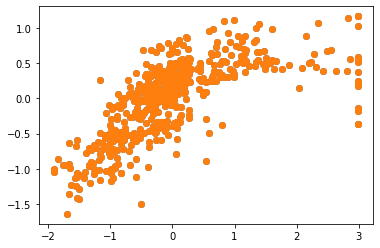

In [9]:
plt.scatter(Y, Y_pred_iridge)
plt.scatter(Y, Y_pred_ridge)
plt.show()